In [1]:
import seaborn as sns 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./Data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Description
<ul>
<li>Age: (age in years)</li>
<li>Sex: (1 = male; 0 = female)</li>
<li>CP: (chest pain type)</li>
<li>TRESTBPS: (resting blood pressure (in mm Hg on admission to the hospital))</li>
<li>CHOL: (serum cholestoral in mg/dl)</li>
<li>FBS: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>RESTECH: (resting electrocardiographic results)</li>
<li>THALACH: (maximum heart rate achieved)</li>
<li>EXANG : (exercise induced angina (1 = yes; 0 = no))</li>
<li>OLDPEAK : (ST depression induced by exercise relative to rest)</li>
<li>SLOPE : (the slope of the peak exercise ST segment)</li>
<li>CA : (number of major vessels (0-3) colored by flourosopy)</li>
<li>THAL : (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
<li>TARGET :(1 or 0)</li>
</ul>

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


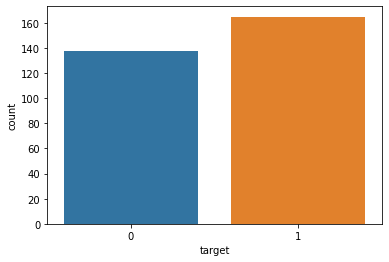

In [4]:
sns.countplot(x='target', data = df)

In [5]:
df.corr()['target'].sort_values(ascending=False)[1:]

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

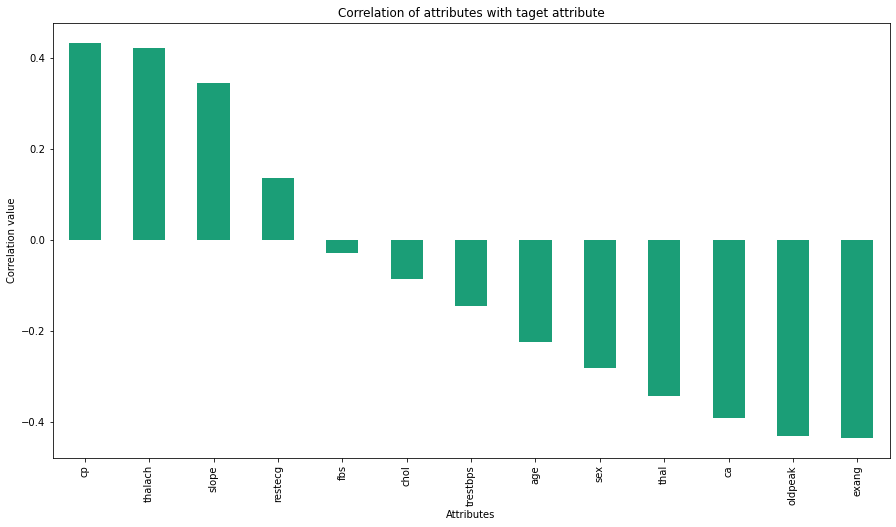

In [6]:
plt.figure(figsize=(15,8))
plt.title("Correlation of attributes with taget attribute")
plt.xlabel("Attributes")
plt.ylabel("Correlation value")
df.corr()['target'].sort_values(ascending=False)[1:].plot(kind='bar', cmap='Dark2')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

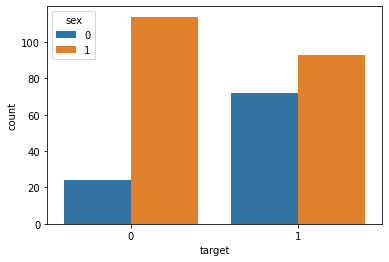

In [8]:
sns.countplot(x='target', hue='sex', data=df)

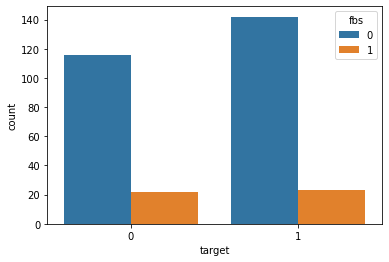

In [9]:
# This shows that people having low blood sugar level are more prone to disease 
sns.countplot(x='target', hue='fbs', data=df)

Text(0, 0.5, 'Maximum heart beat acheived')

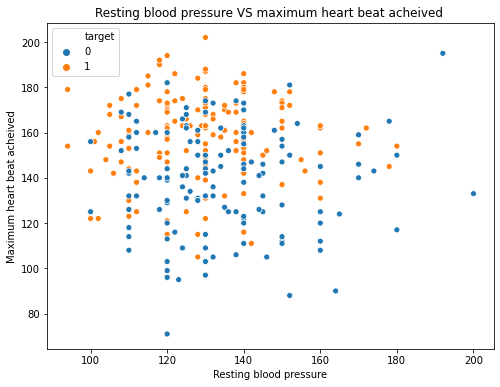

In [10]:
# this shows that affected people have low blood pressure and high heart beat rate
plt.figure(figsize=(8,6))
plt.title("Resting blood pressure VS maximum heart beat acheived ")
sns.scatterplot(x=df['trestbps'], y=df['thalach'], hue=df['target'])
plt.xlabel("Resting blood pressure")
plt.ylabel("Maximum heart beat acheived")

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
early_stop = EarlyStopping(mode='min', monitor='val_loss', verbose =1, patience = 25)

In [13]:
X= df.drop(['target'], axis=1)
y=df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model1 = Sequential()

model1.add(Dense(14, activation ='relu'))
model1.add(Dense(14, activation ='relu'))
model1.add(Dense(10, activation ='relu'))
model1.add(Dense(10, activation ='relu'))
model1.add(Dense(1, activation ='sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [17]:
model1.fit(x = X_train,  y= y_train, validation_data=(X_test, y_test), epochs = 300,
           batch_size = 125, callbacks = [early_stop])

Epoch 1/300
2/2 [==============================] - 2s 1s/step - loss: 0.7053 - val_loss: 0.7006
Epoch 2/300
2/2 [==============================] - 0s 42ms/step - loss: 0.7003 - val_loss: 0.6960
Epoch 3/300
2/2 [==============================] - 0s 51ms/step - loss: 0.6962 - val_loss: 0.6914
Epoch 4/300
2/2 [==============================] - 0s 60ms/step - loss: 0.6916 - val_loss: 0.6869
Epoch 5/300
2/2 [==============================] - 0s 62ms/step - loss: 0.6865 - val_loss: 0.6824
Epoch 6/300
2/2 [==============================] - 0s 64ms/step - loss: 0.6820 - val_loss: 0.6779
Epoch 7/300
2/2 [==============================] - 0s 70ms/step - loss: 0.6784 - val_loss: 0.6737
Epoch 8/300
2/2 [==============================] - 0s 75ms/step - loss: 0.6725 - val_loss: 0.6698
Epoch 9/300
2/2 [==============================] - 0s 74ms/step - loss: 0.6684 - val_loss: 0.6660
Epoch 10/300
2/2 [==============================] - 0s 74ms/step - loss: 0.6657 - val_loss: 0.6624
Epoch 11/300
2/2 [===

Epoch 84/300
2/2 [==============================] - 0s 64ms/step - loss: 0.3593 - val_loss: 0.3835
Epoch 85/300
2/2 [==============================] - 0s 56ms/step - loss: 0.3659 - val_loss: 0.3832
Epoch 86/300
2/2 [==============================] - 0s 46ms/step - loss: 0.3585 - val_loss: 0.3835
Epoch 87/300
2/2 [==============================] - 0s 58ms/step - loss: 0.3380 - val_loss: 0.3841
Epoch 88/300
2/2 [==============================] - 0s 63ms/step - loss: 0.3560 - val_loss: 0.3845
Epoch 89/300
2/2 [==============================] - 0s 70ms/step - loss: 0.3423 - val_loss: 0.3848
Epoch 90/300
2/2 [==============================] - 0s 61ms/step - loss: 0.3541 - val_loss: 0.3848
Epoch 91/300
2/2 [==============================] - 0s 70ms/step - loss: 0.3427 - val_loss: 0.3845
Epoch 92/300
2/2 [==============================] - 0s 79ms/step - loss: 0.3478 - val_loss: 0.3841
Epoch 93/300
2/2 [==============================] - 0s 85ms/step - loss: 0.3353 - val_loss: 0.3840
Epoch 94/3

In [18]:
losses1 =pd.DataFrame(model1.history.history)

In [19]:
predictions1 = model1.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.83      0.87      0.85        39

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [22]:
print(confusion_matrix(y_test,predictions1))

[[30  7]
 [ 5 34]]


In [23]:
model2 = Sequential()

model2.add(Dense(14, activation ='relu'))
model2.add(Dense(14, activation ='relu'))
model2.add(Dense(10, activation ='relu'))
model2.add(Dense(10, activation ='relu'))
model2.add(Dense(1, activation ='sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [24]:
model2.fit(x = X_train,  y= y_train, validation_data=(X_test, y_test), epochs = 300,
           batch_size = 125)

Epoch 1/300
2/2 [==============================] - 1s 233ms/step - loss: 0.7021 - val_loss: 0.6890
Epoch 2/300
2/2 [==============================] - 0s 61ms/step - loss: 0.6966 - val_loss: 0.6879
Epoch 3/300
2/2 [==============================] - 0s 73ms/step - loss: 0.6953 - val_loss: 0.6869
Epoch 4/300
2/2 [==============================] - 0s 56ms/step - loss: 0.6944 - val_loss: 0.6857
Epoch 5/300
2/2 [==============================] - 0s 43ms/step - loss: 0.6946 - val_loss: 0.6845
Epoch 6/300
2/2 [==============================] - 0s 50ms/step - loss: 0.6915 - val_loss: 0.6831
Epoch 7/300
2/2 [==============================] - 0s 51ms/step - loss: 0.6916 - val_loss: 0.6816
Epoch 8/300
2/2 [==============================] - 0s 48ms/step - loss: 0.6899 - val_loss: 0.6800
Epoch 9/300
2/2 [==============================] - 0s 47ms/step - loss: 0.6869 - val_loss: 0.6785
Epoch 10/300
2/2 [==============================] - 0s 55ms/step - loss: 0.6864 - val_loss: 0.6767
Epoch 11/300
2/2 [

Epoch 84/300
2/2 [==============================] - 0s 67ms/step - loss: 0.4209 - val_loss: 0.4138
Epoch 85/300
2/2 [==============================] - 0s 74ms/step - loss: 0.4250 - val_loss: 0.4102
Epoch 86/300
2/2 [==============================] - 0s 72ms/step - loss: 0.4256 - val_loss: 0.4065
Epoch 87/300
2/2 [==============================] - 0s 71ms/step - loss: 0.4086 - val_loss: 0.4049
Epoch 88/300
2/2 [==============================] - 0s 69ms/step - loss: 0.4039 - val_loss: 0.4025
Epoch 89/300
2/2 [==============================] - 0s 67ms/step - loss: 0.3895 - val_loss: 0.4011
Epoch 90/300
2/2 [==============================] - 0s 47ms/step - loss: 0.4107 - val_loss: 0.3975
Epoch 91/300
2/2 [==============================] - 0s 47ms/step - loss: 0.3971 - val_loss: 0.3926
Epoch 92/300
2/2 [==============================] - 0s 55ms/step - loss: 0.3968 - val_loss: 0.3885
Epoch 93/300
2/2 [==============================] - 0s 57ms/step - loss: 0.3921 - val_loss: 0.3860
Epoch 94/3

2/2 [==============================] - 0s 45ms/step - loss: 0.3015 - val_loss: 0.3480
Epoch 167/300
2/2 [==============================] - 0s 45ms/step - loss: 0.2942 - val_loss: 0.3446
Epoch 168/300
2/2 [==============================] - 0s 49ms/step - loss: 0.3028 - val_loss: 0.3440
Epoch 169/300
2/2 [==============================] - 0s 47ms/step - loss: 0.2945 - val_loss: 0.3468
Epoch 170/300
2/2 [==============================] - 0s 51ms/step - loss: 0.2956 - val_loss: 0.3474
Epoch 171/300
2/2 [==============================] - 0s 52ms/step - loss: 0.2915 - val_loss: 0.3470
Epoch 172/300
2/2 [==============================] - 0s 47ms/step - loss: 0.2921 - val_loss: 0.3477
Epoch 173/300
2/2 [==============================] - 0s 51ms/step - loss: 0.2868 - val_loss: 0.3451
Epoch 174/300
2/2 [==============================] - 0s 68ms/step - loss: 0.2814 - val_loss: 0.3467
Epoch 175/300
2/2 [==============================] - 0s 64ms/step - loss: 0.2822 - val_loss: 0.3477
Epoch 176/300


2/2 [==============================] - 0s 51ms/step - loss: 0.2262 - val_loss: 0.3616
Epoch 249/300
2/2 [==============================] - 0s 55ms/step - loss: 0.2466 - val_loss: 0.3651
Epoch 250/300
2/2 [==============================] - 0s 52ms/step - loss: 0.2373 - val_loss: 0.3639
Epoch 251/300
2/2 [==============================] - 0s 43ms/step - loss: 0.2368 - val_loss: 0.3617
Epoch 252/300
2/2 [==============================] - 0s 43ms/step - loss: 0.2436 - val_loss: 0.3609
Epoch 253/300
2/2 [==============================] - 0s 41ms/step - loss: 0.2126 - val_loss: 0.3597
Epoch 254/300
2/2 [==============================] - 0s 40ms/step - loss: 0.2323 - val_loss: 0.3629
Epoch 255/300
2/2 [==============================] - 0s 41ms/step - loss: 0.2189 - val_loss: 0.3630
Epoch 256/300
2/2 [==============================] - 0s 39ms/step - loss: 0.2189 - val_loss: 0.3663
Epoch 257/300
2/2 [==============================] - 0s 53ms/step - loss: 0.2048 - val_loss: 0.3648
Epoch 258/300


In [28]:
predictions2 = model2.predict_classes(X_test) 

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.77      0.85      0.80        39

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [30]:
print(confusion_matrix(y_test,predictions2))

[[27 10]
 [ 6 33]]


In [25]:
losses2 = pd.DataFrame(model2.history.history)

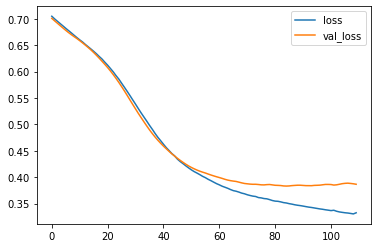

In [26]:
losses1.plot()

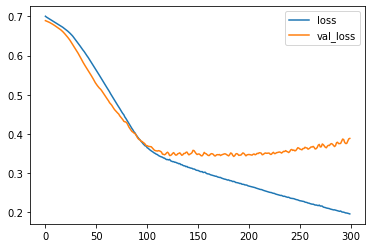

In [27]:
losses2.plot()

In [ ]:
model1.save("heartDiseasemodel1.h5")
